# Titanic Data Competiton

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.datasets import load_boston
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Cleaning

The first part is to identify what segments of data are missing.

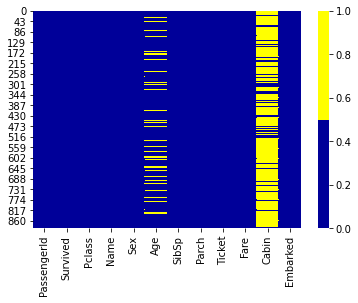

In [6]:
cols = train_data.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

Droping Missing Data of cabin and replaceing missing age with median

In [7]:
train_data.drop('Cabin', axis=1, inplace=True)

med = train_data['Age'].median()
print(med)
train_data['Age'] = train_data['Age'].fillna(med)
train_data.head()

28.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Analysis

Finding correlating features

In [57]:
x = load_boston()

df = pd.DataFrame(x.data, columns = x.feature_names)
df["Survived"] = x.target

cor_target = abs(df.corr())
relevant_features = cor_target[cor_target>0.5]
relevant_features


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Survived
CRIM,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625505,0.582764,NaN,NaN,NaN,NaN
ZN,NaN,1.000000,0.533828,NaN,0.516604,NaN,0.569537,0.664408,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,0.533828,1.000000,NaN,0.763651,NaN,0.644779,0.708027,0.595129,0.720760,NaN,NaN,0.603800,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,0.516604,0.763651,NaN,1.000000,NaN,0.731470,0.769230,0.611441,0.668023,NaN,NaN,0.590879,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.613808,0.695360
AGE,NaN,0.569537,0.644779,NaN,0.731470,NaN,1.000000,0.747881,NaN,0.506456,NaN,NaN,0.602339,NaN
DIS,NaN,0.664408,0.708027,NaN,0.769230,NaN,0.747881,1.000000,NaN,0.534432,NaN,NaN,NaN,NaN
RAD,0.625505,NaN,0.595129,NaN,0.611441,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
TAX,0.582764,NaN,0.720760,NaN,0.668023,NaN,0.506456,0.534432,0.910228,1.000000,NaN,NaN,0.543993,NaN


Graphs with high correlation to 'Survival'

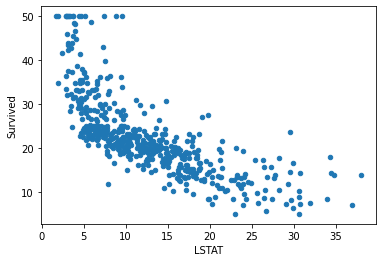

In [60]:
#test_data.plot(x ='Fare', y='Pclass', kind = 'scatter')
df.plot.scatter(x='LSTAT', y='Survived')

In [70]:
train_data.plot.box(x='Survived', y='Fare')


KeyError: 'sex'

In [10]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
